## US Presidential Campaign Data Exploration

Instructions:
- Problems 1-12 are shown in code cells below
- Each problem begins with #@
- Insert your code below the problem line
- Do not make changes outside the problem cells.
- Be sure to include plot titles, labels, etc. as shown.
- The goal is to create plots that look like the ones I provide.
- Use a semicolon after the last plotting statement in each cell.
- "Restart and run all" before submitting your notebook.

An exploration of California campaign contribution data for the 2016 US presidential election.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')   # 'talk' for slightly larger

In [ ]:
# This is a randomly-sample subset of the full data set.
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/campaign-ca-2016-sample.csv")

Which candidates received the most contributions?  

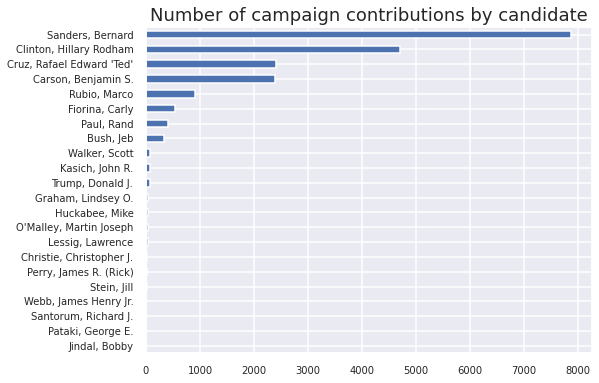

In [ ]:
#@ 1 Show the number of contributions by candidate using a barplot.  
# Hint: use value_counts() and pandas barh() plot.  barh() is
# like bar() but horizontal.  
# Hint: value_counts() has a parameter 'ascending'.
hightest = df['cand_nm'].value_counts().max() + 200;
df['cand_nm'].value_counts(ascending = True).plot.barh()
plt.title('Number of campaign contributions by candidate')
plt.yticks(size = 10)
plt.xticks(np.arange(0,hightest,1000), size = 10);

Let's look at the amount of the contributions, instead of the number of contributions.  Which candidates had the highest median contribution amounts?  

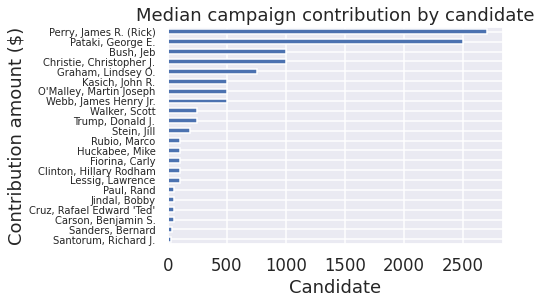

In [ ]:
#@ 2 Show the median contribution amount by candidate.
# Hint: use an aggregation function. 
tempDf = (df.groupby('cand_nm')['contb_receipt_amt'].agg(np.median)).sort_values(ascending = True)
tempDf.plot.barh()
plt.title('Median campaign contribution by candidate')
plt.xlabel('Candidate')
plt.ylabel('Contribution amount ($)')
plt.yticks(size = 10);

What is the distribution of the contribution amounts?  There are a small number of very large amounts, which make it hard to display the distribution.  Also, there are some negative contribution amounts that seem to reflect returned contributions.  Therefore, let's focus on contributions ranging from 0 to 3,000 dollars.

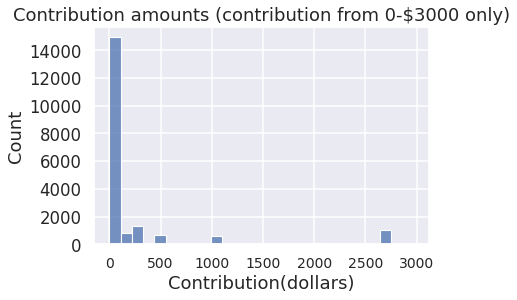

In [ ]:
#@ 3 Create a histogram showing contribution amounts.  Use
# contributions from 0 - 3000 dollars only.  Create the
# histogram with Seaborn's histplot()
# Hint: restrict the dollar range in the data, not in the plotting.
# Hint: use the bins parameter of histplot to give bins of width 100.
# Consider using Python's range() to specify the bins.
newdf = df[(df.contb_receipt_amt >= 0) & (df.contb_receipt_amt <= 3000)]
sns.histplot(data = newdf, x = 'contb_receipt_amt', bins=range(0, 3000, 110))
plt.title('Contribution amounts (contribution from 0-$3000 only)')
plt.xlabel('Contribution(dollars)')
plt.xticks(np.arange(0,3500,500), size = 14)
plt.yticks(np.arange(0,15000,2000));

It appears that most contributions are small.  Let's restrict our attention to an even smaller range of contributions to get a better idea of how small contributions are distributed.

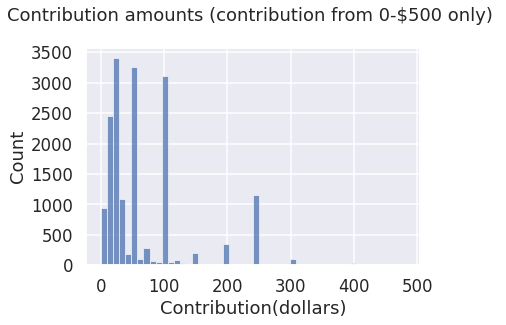

In [ ]:
#@ 4 Create a histogram showing contribution amounts.  Use
# contributions from 0 - 500 dollars only.  Create the
# histogram with Seaborn's histplot().
newdf = df[(df.contb_receipt_amt >= 0) & (df.contb_receipt_amt < 500)]
sns.histplot(data = newdf, x = 'contb_receipt_amt',  bins = 50 )
plt.title('Contribution amounts (contribution from 0-$500 only) \n')
plt.xlabel('Contribution(dollars)')
plt.xticks(np.arange(0,550,100))
plt.yticks(np.arange(0,3600,500));

The appearance of a histogram is sensitive to the number of bins that are used and where the bin edges lie.  Let's look at the contribution amounts again using a density plot.

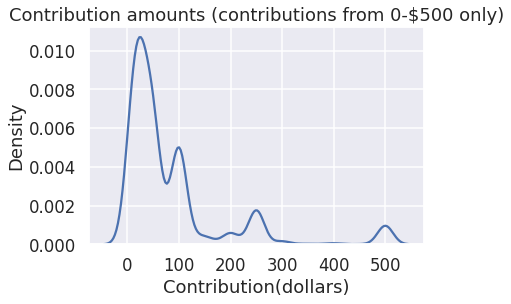

In [ ]:
#@ 5 Create a density plot (sometimes called a kernel density
# plot) showing contribution amounts.  Show contributions from 
# 0 - 500 dollars only.  Create the density plot with Seaborn's kdeplot().
# Hint: you may want to start by creating a series containing
# the contb_receipt_amt values from 0-500.

newdf = df[(df.contb_receipt_amt >= 0) & (df.contb_receipt_amt <= 500)]
sns.kdeplot('contb_receipt_amt', data = newdf).set(title='Contribution amounts (contributions from 0-$500 only)', xlabel='Contribution(dollars)')
plt.xticks(np.arange(0,550,100));

Let's compare the size of contributions between candidates Rubio and Cruz.  Did one of them tend to get larger-sized contributions?

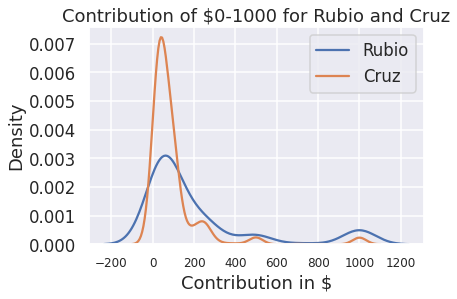

In [ ]:
#@ 6 Create a "double density plot" showing the contributions for
# Rubio and Cruz.  Show contributions in the range of 0-1000 dollars
# only.  Use a seaborn kdeplot.
# Hint: use the 'hue' parameter.
# Hint: first create a modified version of the data frame that contains
# only contributions for Rubio and Cruz, and only contributions from 0 to 1000 dollars.
# Hint: to customize the legend, use plt.legent().

newdf = df[(df.contb_receipt_amt >= 0) & (df.contb_receipt_amt <= 1000) & ((df.cand_nm.str.contains("Cruz")) | (df.cand_nm.str.contains("Rubio")) ) ]
sns.kdeplot('contb_receipt_amt', data =  newdf[newdf['cand_nm'] == "Rubio, Marco"], label = "Rubio")
sns.kdeplot('contb_receipt_amt', data = newdf[newdf['cand_nm'] == "Cruz, Rafael Edward 'Ted'"], label = "Cruz").set(title='Contribution of $0-1000 for Rubio and Cruz', xlabel='Contribution in $')
plt.legend()
plt.xticks(np.arange(-200,1400,200), size = 12)
plt.yticks(np.arange(0,0.008, 0.001));

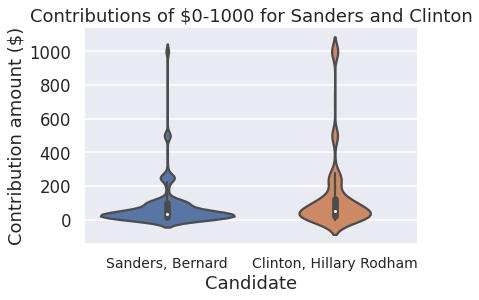

In [ ]:
#@ 7 Show the contributions of 0-1000 for Clinton and Sanders.  
# Use a seaborn violin plot.
# Hint: create a modified version of the data frame that contains only
# contributions for Sanders and Clinton, and only contains contributions
# from 0 to 1000 dollars. 
newdf = df[(df.contb_receipt_amt >= 0) & (df.contb_receipt_amt <= 1000) & ((df.cand_nm.str.contains("Clinton")) | (df.cand_nm.str.contains("Sanders")) ) ]
sns.violinplot(x = 'cand_nm', y =  'contb_receipt_amt', data =  newdf)
plt.title('Contributions of $0-1000 for Sanders and Clinton')
plt.xlabel('Candidate')
plt.ylabel('Contribution amount ($)')
plt.yticks(np.arange(0,1100, 200))
plt.xticks(size = 14);

Rubio and Cruz were Republican candidates.  Let's look at a pair of Democratic candidates.

Which occupations are associated with the greatest number of contributions?  This will be interesting, but we need to keep in mind that the occupation with the greatest number of contributions might just be the most common occupation.

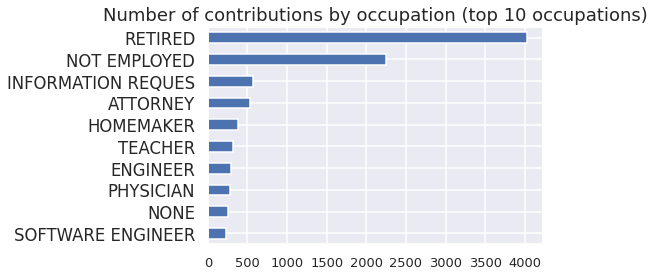

In [ ]:
#@ 8 Create a bar plot showing th total number of contributions by occupation, 
# for the 10 occupations with the largest number of contributions.  Use
# Pandas for the bar plot.  Limit the occupation names to 18 characters.
# Hint: to limit the occupation names to 18 characters, you can create a 
# new column 'short_occ' by using pd.Series.str.slice on the 
# 'contbr_occupation' column.
df['short_occ'] = df.contbr_occupation.str.slice(0,18)
newOne = df.short_occ.value_counts()[:10]
newOne.sort_values().plot.barh()
plt.title('Number of contributions by occupation (top 10 occupations)')
plt.xticks(np.arange(0,4100, 500), size = 13);

We can classify contributors as either employed, unemployed, or retired.  Among these groups, which makes the most contributions?

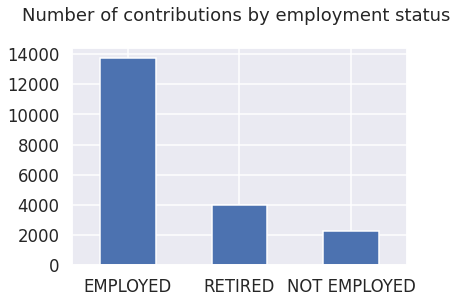

In [ ]:
#@ 9 Create a new column "employment_status", derived from the 
# contbr_occupation column.  The value of employment_status should be
# "RETIRED" if the occupation is "RETIRED", "NOT EMPLOYED"
# if the occupation is "NOT EMPLOYED", and "EMPLOYED" otherwise.
# Show the number of contributions by employment status as a bar plot.
# Hint: one way to create the new column of the data frame is like this:
# df['employment_status'] = df['contbr_occupation'].apply(emp_status)
# where emp_status is a function you create that takes as input a 
# contbr_occupation value and returns an employement 
# status value. 
def emp_status(occuptation):
  if occuptation == 'RETIRED':
    return "RETIRED"
  elif occuptation == 'NOT EMPLOYED':
    return "NOT EMPLOYED"
  else:
    return "EMPLOYED"

df['employement_status'] = df['contbr_occupation'].apply(emp_status)

df['employement_status'].value_counts().plot.bar()
plt.title('Number of contributions by employment status \n')
plt.yticks(np.arange(0,14100, 2000))
plt.xticks(rotation = 360);

Do retired contributors tend to make smaller contributions than employed contributors?  It seems likely, but what does the data say?

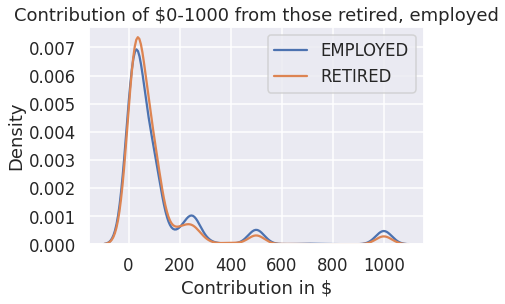

In [ ]:
#@ 10 Create a double density plot showing the distribution of
# contribution amounts from those with employment_status values
# of RETIRED and EMPLOYED.  Include only contributions of $0-1000.
# Use Seaborn's kdeplot.
# Hint: consider the 'hue' and 'common_norm' parameters of kdeplot.
newdf = df[(df.contb_receipt_amt >= 0) & (df.contb_receipt_amt <= 1000) & ((df.employement_status.str.contains("RETIRED")) | (df.employement_status.str.contains("EMPLOYED")) ) ]
sns.kdeplot('contb_receipt_amt', data =  newdf[newdf['employement_status'] == "EMPLOYED"], label = "EMPLOYED")
sns.kdeplot('contb_receipt_amt', data = newdf[newdf['employement_status'] == "RETIRED"], label = "RETIRED").set(title='Contribution of $0-1000 from those retired, employed', xlabel='Contribution in $')
plt.legend()
plt.yticks(np.arange(0,0.008, 0.001))
plt.xticks(np.arange(0, 1100, 200));


It appears that contributions from the retired and the employed are pretty similar, although there is a significant difference when you focus on larger contributions.  Let's look more into the size of contributions from those who are employed, retired, or unemployed.  

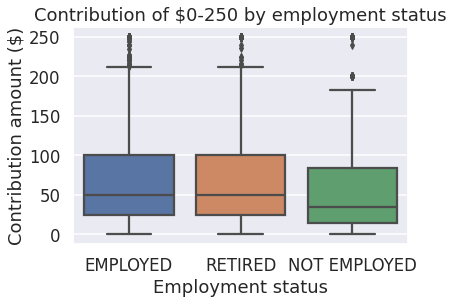

In [ ]:
#@ 11 Create a box plot of contribution amounts for each employment
# status category.  Use Seaborn to create the bar plot, and show
# only contributions in the range of $0-250.
# Hint: you may want to create a version of df that contains only
# contributions in the 0-250 range.
diffDf = df[(df.contb_receipt_amt >= 0) & (df.contb_receipt_amt <= 250)]
sns.boxplot(x= df['employement_status'],y = diffDf['contb_receipt_amt'])
plt.title('Contribution of $0-250 by employment status')
plt.ylabel('Contribution amount ($)')
plt.xlabel('Employment status');

Previously we looked at the number of contributions from different occupations.  What about the size of contributions from different occupations?  Let's focus on a few occupations that contribute a lot.

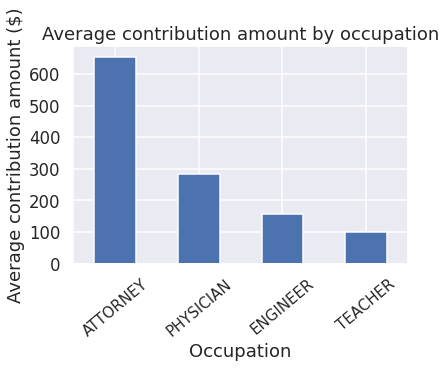

In [ ]:
#@ 12 Create a bar plot showing the average contribution amount
# for the occupations 'ATTORNEY', 'TEACHER', 'ENGINEER' and 'PHYSICIAN'.
# Include contributions of any amount.  Use Pandas to create the bar plot.
# Show the occupations in decreasing order of mean contribution amount.
# Hint: you may want to create a new data frame that is like df except
# that it only includes data associated with the four occupations.
# To do this, consider the Pandas method pd.Series.isin(). 

otherDf = df[(df.contbr_occupation == "ATTORNEY") | (df.contbr_occupation == "TEACHER")  | (df.contbr_occupation == "ENGINEER") | (df.contbr_occupation == "PHYSICIAN")]
otherDf = otherDf.groupby('contbr_occupation')['contb_receipt_amt'].mean().sort_values(ascending=False)
otherDf.plot.bar()
plt.title('Average contribution amount by occupation')
plt.xlabel('Occupation')
plt.ylabel('Average contribution amount ($)')
plt.yticks(np.arange(0, 700, 100))
plt.xticks(rotation = 40, size = 15);